<a href="https://colab.research.google.com/github/VitalyGladyshev/med_work/blob/main/Med_Stat_HW_8_Prj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Прикладная статистика в медицине

## ДЗ 8 Проект Гладышев В.В.

## Анализ связи между социальной поддержкой и симптомами посттравматического стрессового расстройства у китайских пациенток с раком яичников

### Подключение библиотек

In [94]:
library(ggplot2)
library(dplyr)
library(tidyverse)

In [95]:
install.packages('ggpubr')
library(ggpubr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [96]:
install.packages('caret')
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Загрузка и подготовка данных

In [97]:
data_ptsd <- read.csv('/content/S1Data.csv', header = TRUE, sep = '\t')
head(data_ptsd)

,Age,Marital.status,Education,Income,Cancer.stage,Treatment.type,Metastasis,Social.support,Hope,Resilience,PTSD.symptoms
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,46,Married/living with a partner,Junior college or above,2001-3000,Ⅰ,No treatment,No,30,36,39,21
2,53,Married/living with a partner,Secondary school,≤2000,Ⅱ,No treatment,No,25,37,30,39
3,58,Married/living with a partner,Secondary school,2001-3000,Ⅱ,No treatment,No,23,34,42,35
4,57,Married/living with a partner,Secondary school,2001-3000,Ⅱ,No treatment,No,21,32,44,33
5,56,Married/living with a partner,Primary school,≤2000,Ⅲ and Ⅳ,No treatment,No,16,31,32,34
6,56,Married/living with a partner,Primary school,≤2000,Ⅲ and Ⅳ,No treatment,No,14,33,30,32


In [98]:
str(data_ptsd)

'data.frame':	201 obs. of  11 variables:
 $ Age           : int  46 53 58 57 56 56 47 47 51 51 ...
 $ Marital.status: chr  "Married/living with a partner" "Married/living with a partner" "Married/living with a partner" "Married/living with a partner" ...
 $ Education     : chr  "Junior college or above" "Secondary school" "Secondary school" "Secondary school" ...
 $ Income        : chr  "2001-3000" "≤2000" "2001-3000" "2001-3000" ...
 $ Cancer.stage  : chr  "Ⅰ" "Ⅱ" "Ⅱ" "Ⅱ" ...
 $ Treatment.type: chr  "No treatment" "No treatment" "No treatment" "No treatment" ...
 $ Metastasis    : chr  "No" "No" "No" "No" ...
 $ Social.support: int  30 25 23 21 16 14 15 17 33 31 ...
 $ Hope          : int  36 37 34 32 31 33 28 30 37 35 ...
 $ Resilience    : int  39 30 42 44 32 30 35 33 53 51 ...
 $ PTSD.symptoms : int  21 39 35 33 34 32 67 65 35 33 ...


In [99]:
summary(data_ptsd)

      Age        Marital.status      Education            Income         
 Min.   :24.00   Length:201         Length:201         Length:201        
 1st Qu.:50.00   Class :character   Class :character   Class :character  
 Median :55.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :55.28                                                           
 3rd Qu.:62.00                                                           
 Max.   :79.00                                                           
 Cancer.stage       Treatment.type      Metastasis        Social.support 
 Length:201         Length:201         Length:201         Min.   : 8.00  
 Class :character   Class :character   Class :character   1st Qu.:25.00  
 Mode  :character   Mode  :character   Mode  :character   Median :30.00  
                                                          Mean   :28.98  
                                                          3rd Qu.:33.00  
                                      

In [100]:
unique(data_ptsd$Marital.status)

[1] "Married/living with a partner" "Single/widowed/divorced"

In [101]:
unique(data_ptsd$Education)

[1] "Junior college or above" "Secondary school"       
[3] "Primary school"

In [102]:
unique(data_ptsd$Income)

[1] "2001-3000" "≤2000"     "＞3000"

In [103]:
unique(data_ptsd$Cancer.stage)

[1] "Ⅰ"       "Ⅱ"       "Ⅲ and Ⅳ"

In [104]:
unique(data_ptsd$Treatment.type)

[1] "No treatment"       "Chemotherapy"       "Surgery"           
[4] "Combined treatment"

In [105]:
unique(data_ptsd$Metastasis)

[1] "No"  "Yes"

In [106]:
data_ptsd$Marital.status <- as.factor(data_ptsd$Marital.status)
data_ptsd$Education <- as.factor(data_ptsd$Education)
data_ptsd$Income <- as.factor(data_ptsd$Income)
data_ptsd$Cancer.stage <- as.factor(data_ptsd$Cancer.stage)
data_ptsd$Treatment.type <- as.factor(data_ptsd$Treatment.type)
data_ptsd$Metastasis <- as.factor(data_ptsd$Metastasis)

In [107]:
str(data_ptsd)

'data.frame':	201 obs. of  11 variables:
 $ Age           : int  46 53 58 57 56 56 47 47 51 51 ...
 $ Marital.status: Factor w/ 2 levels "Married/living with a partner",..: 1 1 1 1 1 1 1 1 2 2 ...
 $ Education     : Factor w/ 3 levels "Junior college or above",..: 1 3 3 3 2 2 3 3 3 3 ...
 $ Income        : Factor w/ 3 levels "＞3000","≤2000",..: 3 2 3 3 2 2 2 2 2 2 ...
 $ Cancer.stage  : Factor w/ 3 levels "Ⅰ","Ⅱ","Ⅲ and Ⅳ": 1 2 2 2 3 3 3 3 3 3 ...
 $ Treatment.type: Factor w/ 4 levels "Chemotherapy",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Metastasis    : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Social.support: int  30 25 23 21 16 14 15 17 33 31 ...
 $ Hope          : int  36 37 34 32 31 33 28 30 37 35 ...
 $ Resilience    : int  39 30 42 44 32 30 35 33 53 51 ...
 $ PTSD.symptoms : int  21 39 35 33 34 32 67 65 35 33 ...


In [108]:
summary(data_ptsd)

      Age                              Marital.status
 Min.   :24.00   Married/living with a partner:183   
 1st Qu.:50.00   Single/widowed/divorced      : 18   
 Median :55.00                                       
 Mean   :55.28                                       
 3rd Qu.:62.00                                       
 Max.   :79.00                                       
                   Education         Income    Cancer.stage
 Junior college or above: 27   ＞3000   :42   Ⅰ      : 36  
 Primary school         : 54   ≤2000    :98   Ⅱ      : 19  
 Secondary school       :120   2001-3000:61   Ⅲ and Ⅳ:146  
                                                           
                                                           
                                                           
            Treatment.type Metastasis Social.support       Hope     
 Chemotherapy      : 60    No :187    Min.   : 8.00   Min.   :25.0  
 Combined treatment:115    Yes: 14    1st Qu.:25.00   1st Qu.:33.

Проверка на пропущенные данные

In [109]:
sum(is.na(data_ptsd))

[1] 0

## EDA

### Визуализация непрерывных данных

In [110]:
numeric_columns <- data_ptsd[, sapply(data_ptsd, is.numeric)]
head(numeric_columns)

,Age,Social.support,Hope,Resilience,PTSD.symptoms
,<int>,<int>,<int>,<int>,<int>
1,46,30,36,39,21
2,53,25,37,30,39
3,58,23,34,42,35
4,57,21,32,44,33
5,56,16,31,32,34
6,56,14,33,30,32


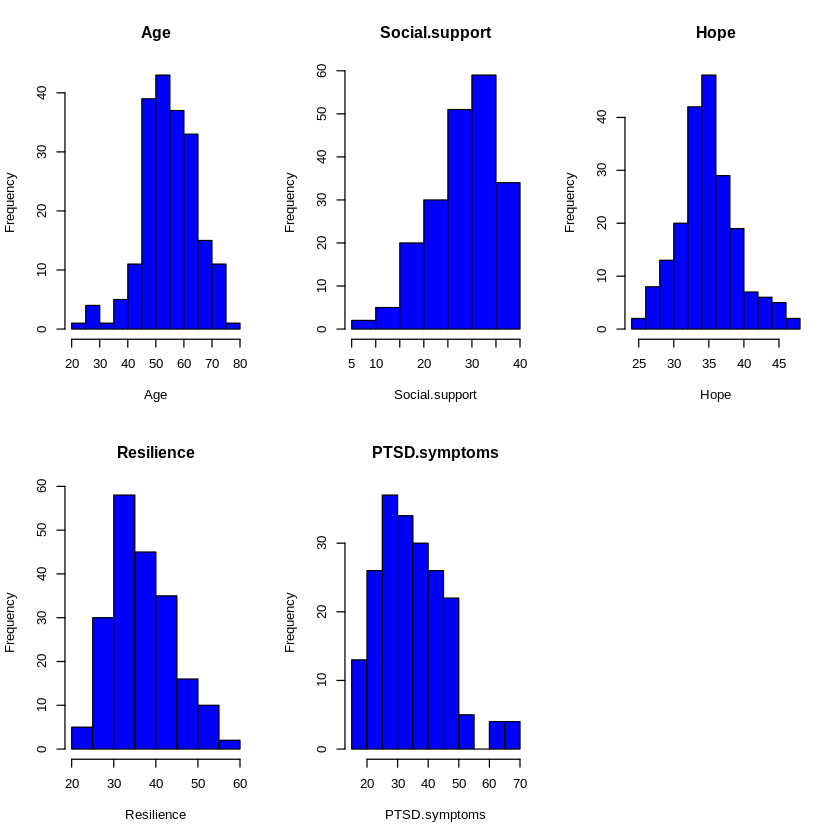

In [111]:
par(mfrow=c(2, 3))

for (i in 1:ncol(numeric_columns)) {
    hist(numeric_columns[, i], main=names(numeric_columns)[i], xlab=names(numeric_columns)[i], col='blue')
}

par(mfrow=c(1, 1))

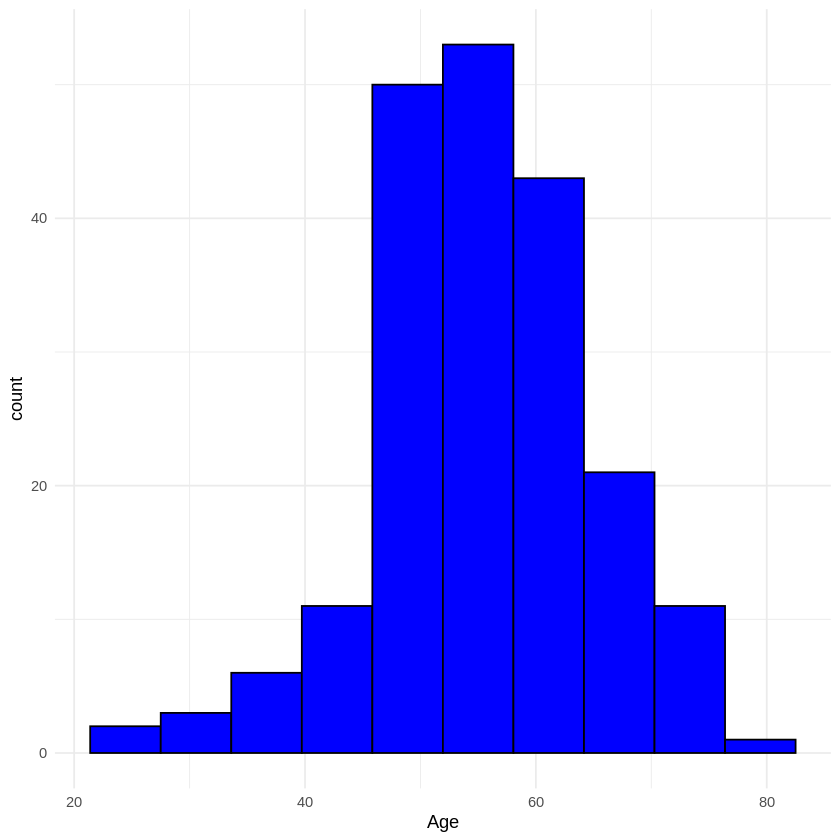

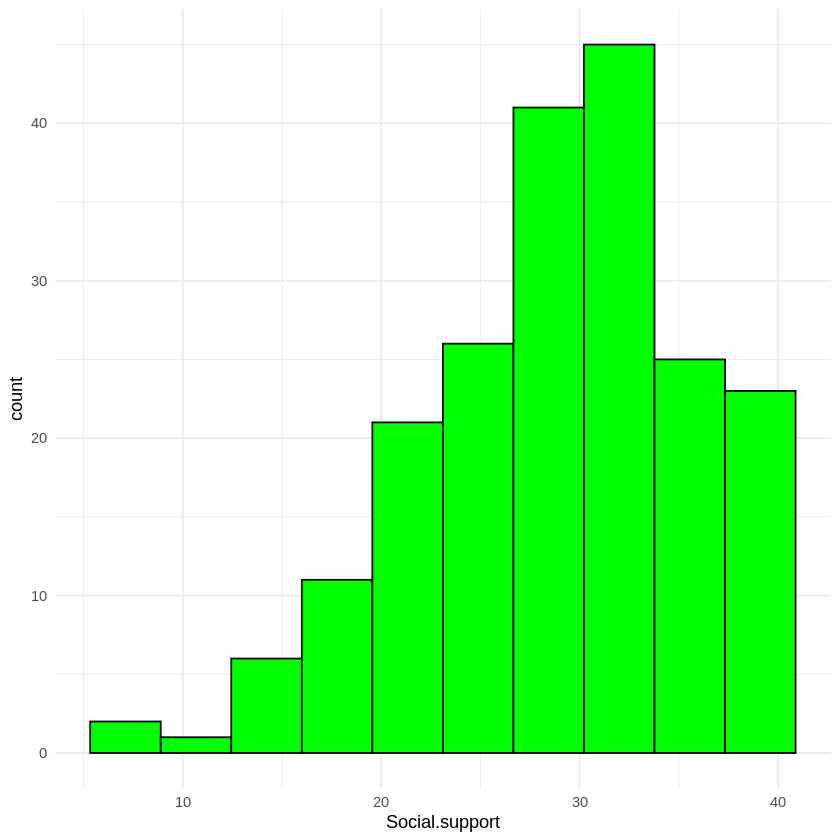

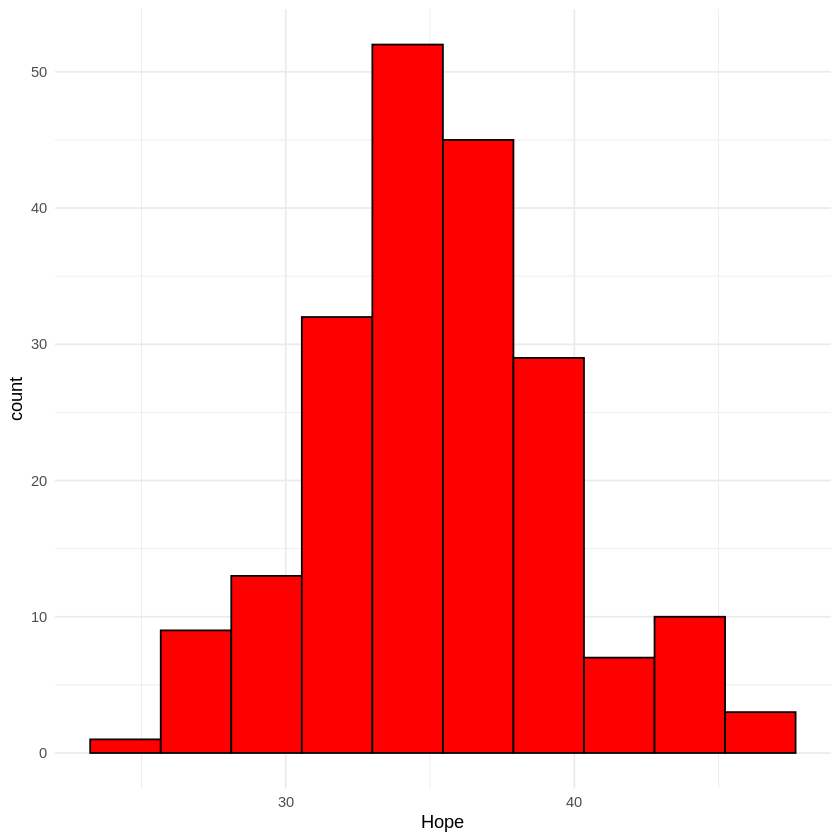

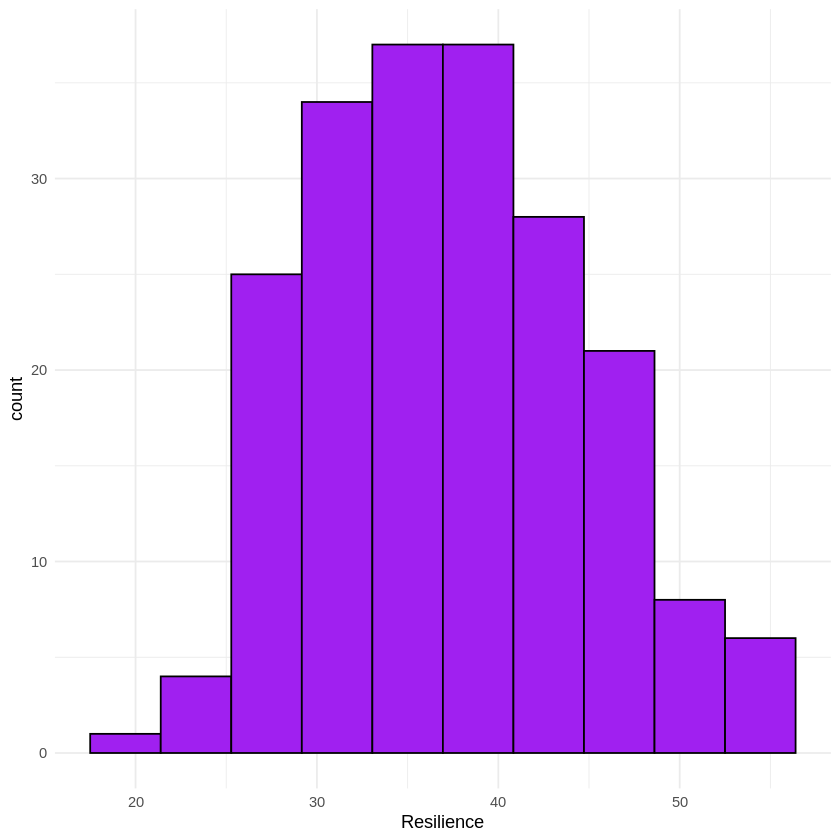

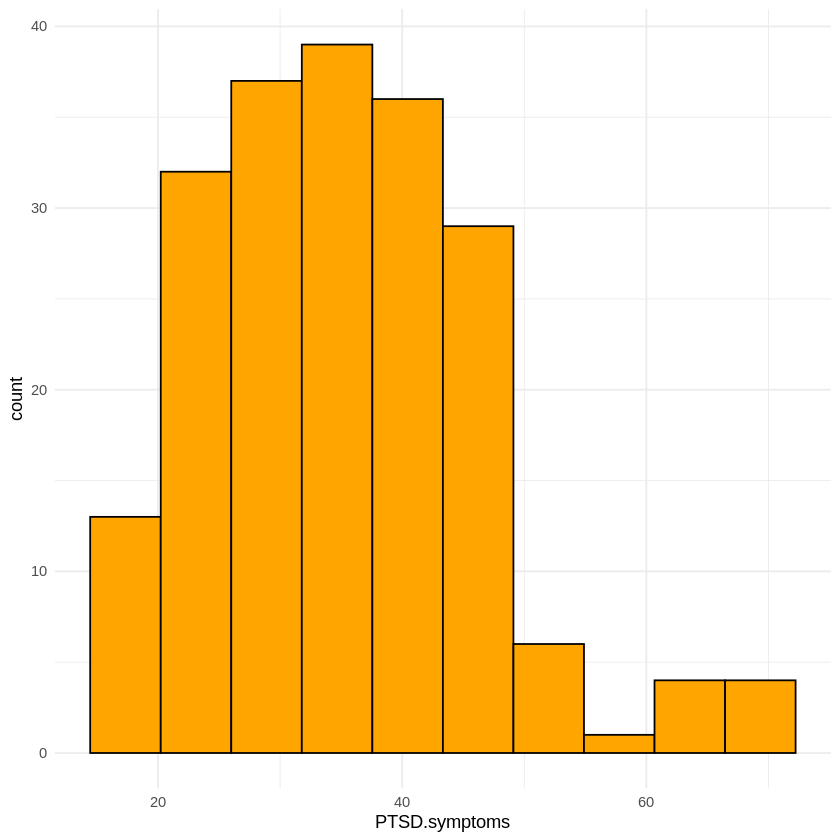

In [112]:
ggplot(data_ptsd, aes(x=Age)) + geom_histogram(bins=10, color="black", fill="blue") + theme_minimal()
ggplot(data_ptsd, aes(x=Social.support)) + geom_histogram(bins=10, color="black", fill="green") + theme_minimal()
ggplot(data_ptsd, aes(x=Hope)) + geom_histogram(bins=10, color="black", fill="red") + theme_minimal()
ggplot(data_ptsd, aes(x=Resilience)) + geom_histogram(bins=10, color="black", fill="purple") + theme_minimal()
ggplot(data_ptsd, aes(x=PTSD.symptoms)) + geom_histogram(bins=10, color="black", fill="orange") + theme_minimal()

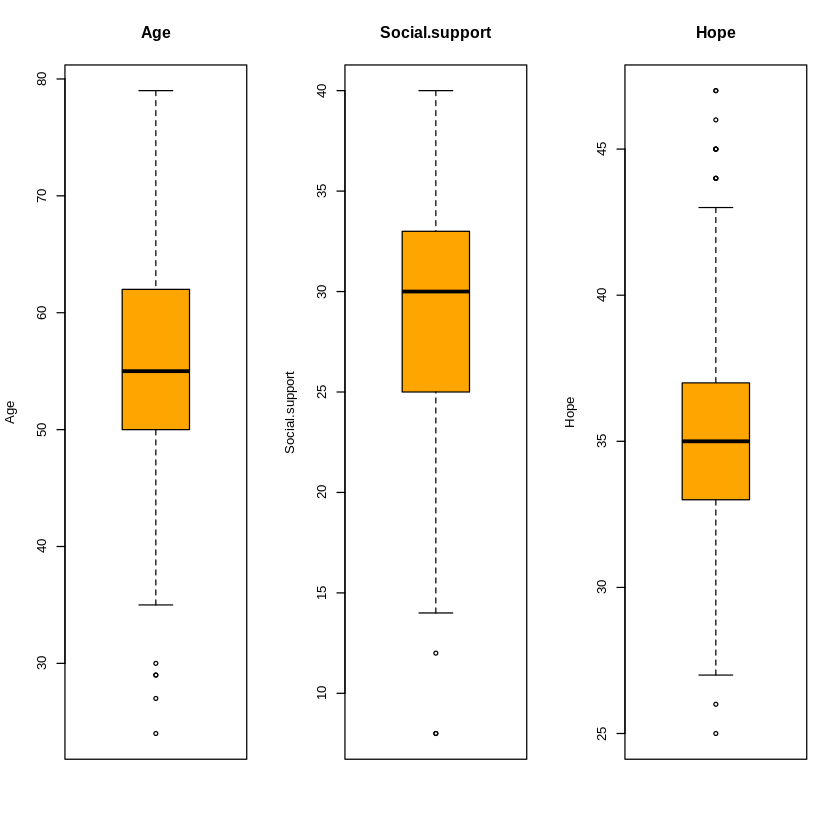

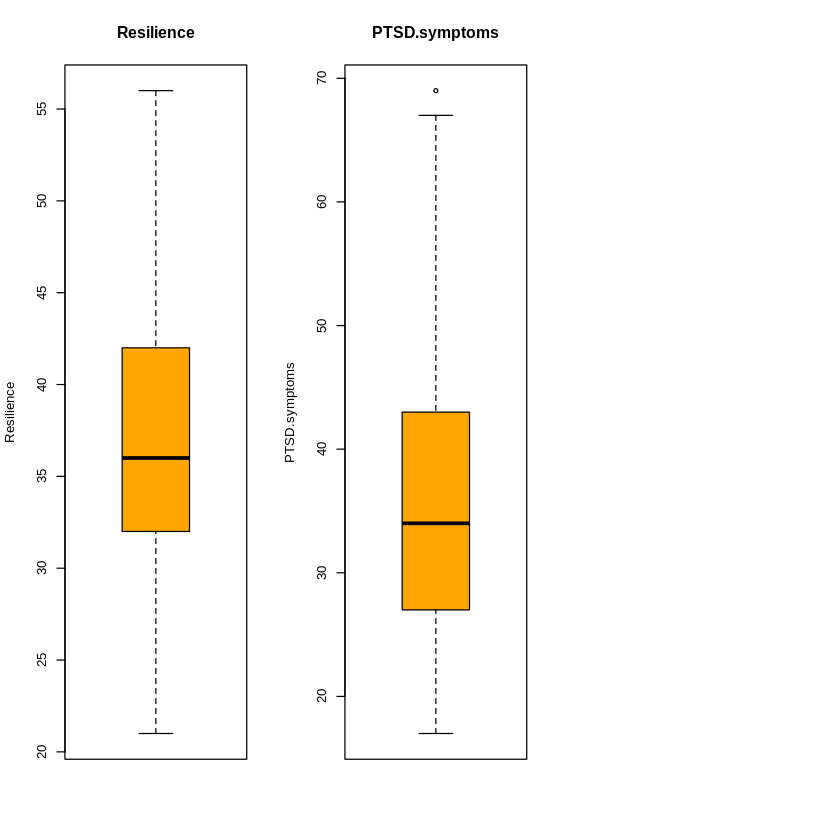

In [113]:
par(mfrow=c(1, 3))
for (i in 1:ncol(numeric_columns)) {
    boxplot(numeric_columns[, i], main=names(numeric_columns)[i], ylab=names(numeric_columns)[i], col='orange')
}

par(mfrow=c(1, 1))

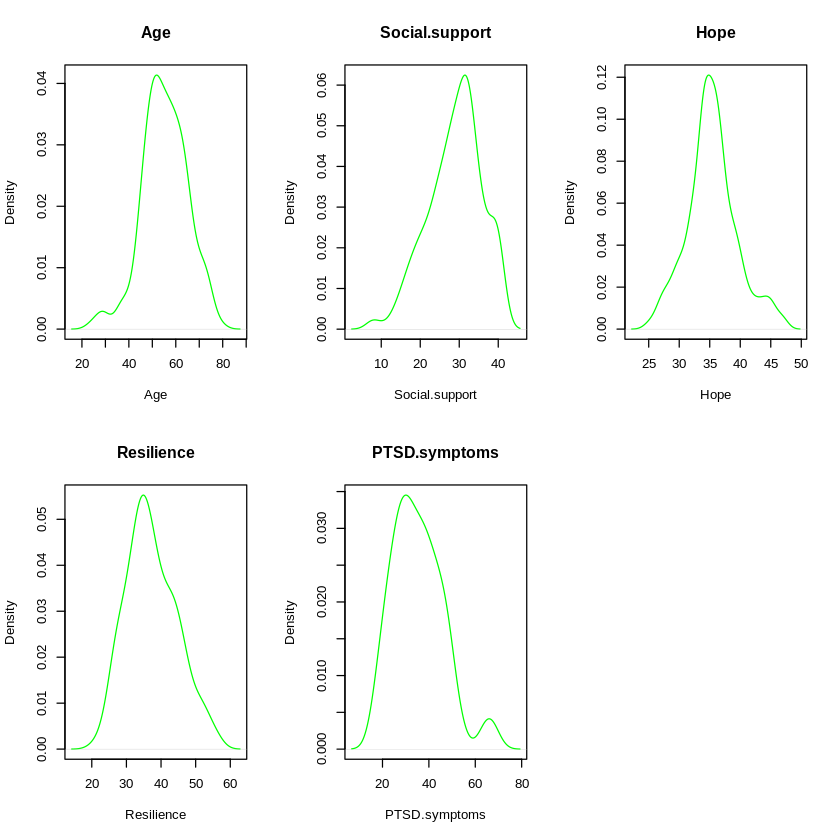

In [114]:
par(mfrow=c(2, 3))

for (i in 1:ncol(numeric_columns)) {
    plot(density(numeric_columns[, i], na.rm = TRUE), main=names(numeric_columns)[i], xlab=names(numeric_columns)[i], col='green')
}

par(mfrow=c(1, 1))

In [115]:
shapiro.test(data_ptsd$Age)


	Shapiro-Wilk normality test

data:  data_ptsd$Age
W = 0.9853, p-value = 0.03464


In [116]:
shapiro.test(data_ptsd$Social.support)


	Shapiro-Wilk normality test

data:  data_ptsd$Social.support
W = 0.9712, p-value = 0.0003823


In [117]:
shapiro.test(data_ptsd$Hope)


	Shapiro-Wilk normality test

data:  data_ptsd$Hope
W = 0.97726, p-value = 0.002391


In [118]:
shapiro.test(data_ptsd$Resilience)


	Shapiro-Wilk normality test

data:  data_ptsd$Resilience
W = 0.98249, p-value = 0.0132


In [119]:
shapiro.test(data_ptsd$PTSD.symptoms)


	Shapiro-Wilk normality test

data:  data_ptsd$PTSD.symptoms
W = 0.95838, p-value = 1.264e-05


Распределение параметров отлично от нормального

In [120]:
cor_matrix <- cor(numeric_columns)

print(cor_matrix)

                       Age Social.support       Hope  Resilience PTSD.symptoms
Age             1.00000000      0.0520179 -0.1032079 -0.06461448    0.07105328
Social.support  0.05201790      1.0000000  0.4571162  0.25327906   -0.40734661
Hope           -0.10320792      0.4571162  1.0000000  0.39191900   -0.53458261
Resilience     -0.06461448      0.2532791  0.3919190  1.00000000   -0.35670493
PTSD.symptoms   0.07105328     -0.4073466 -0.5345826 -0.35670493    1.00000000


### Визуализация категориальных данных

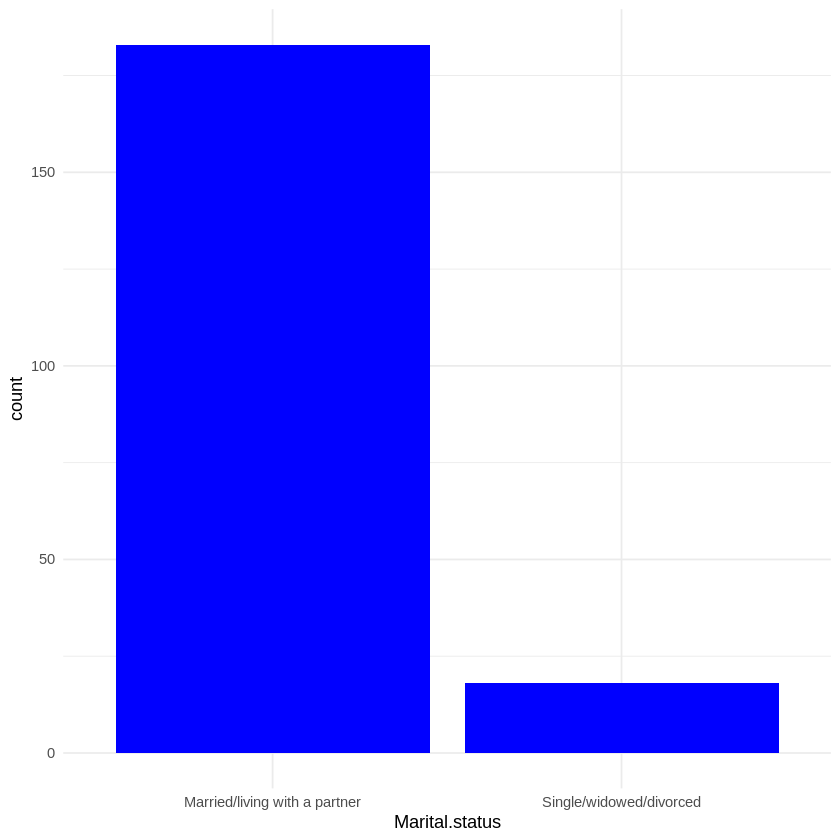

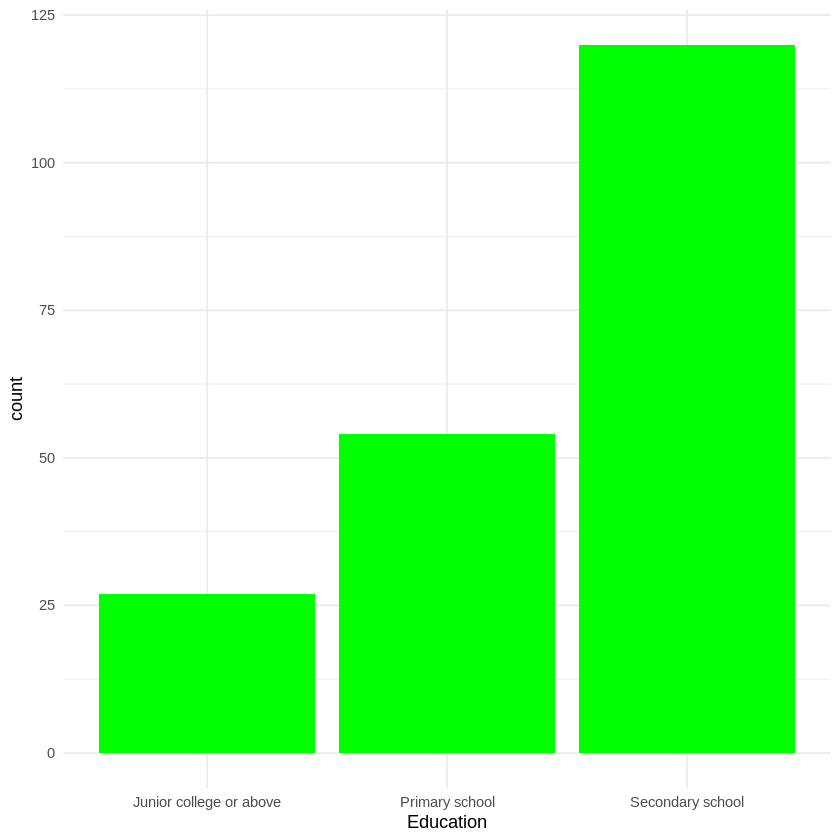

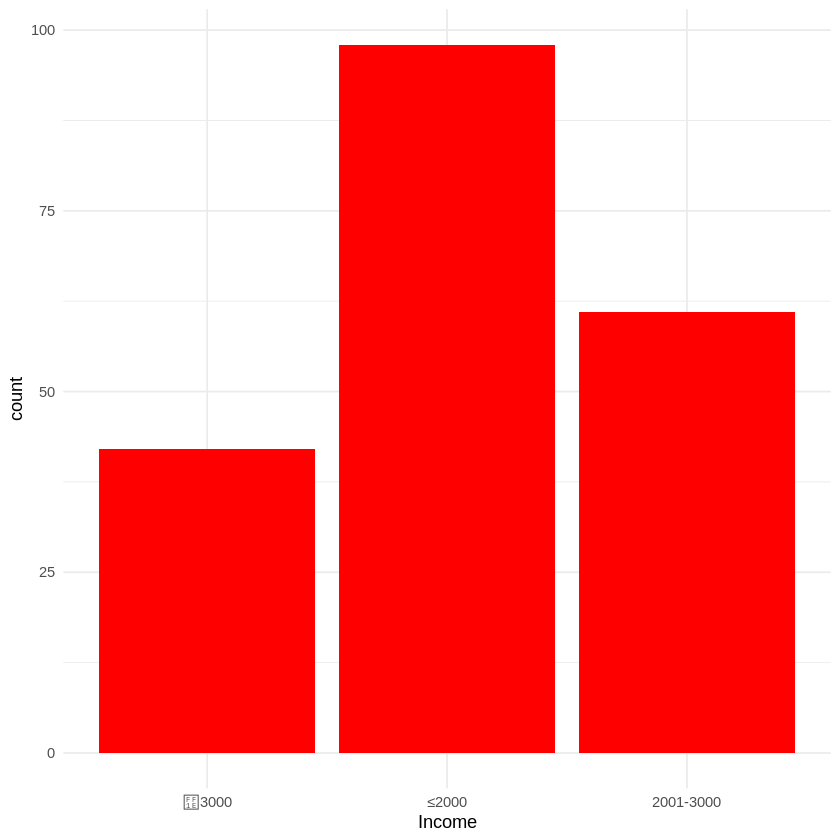

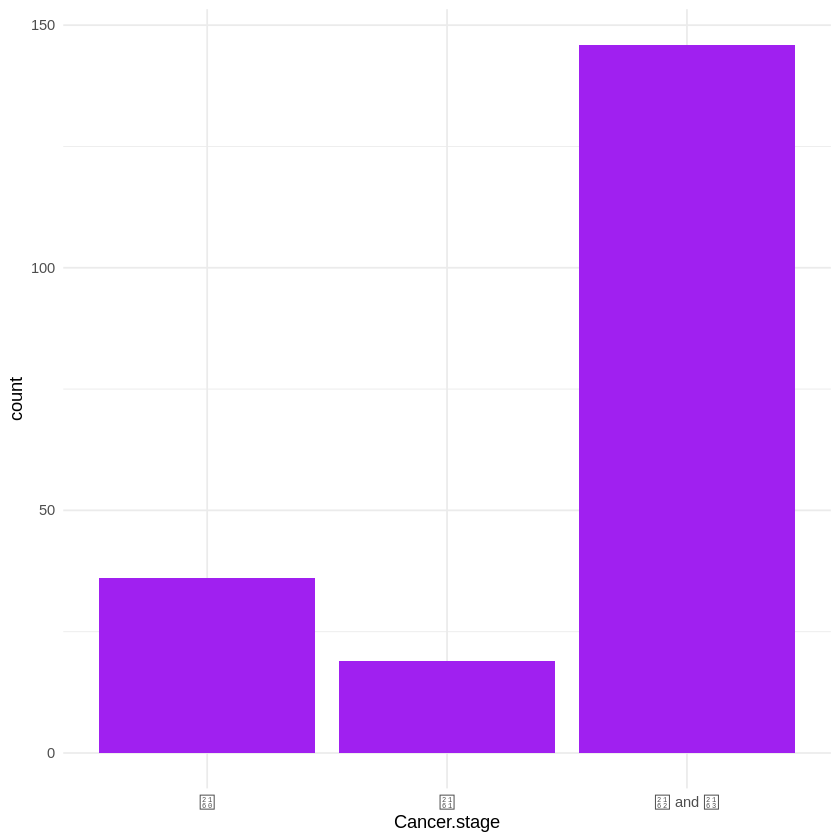

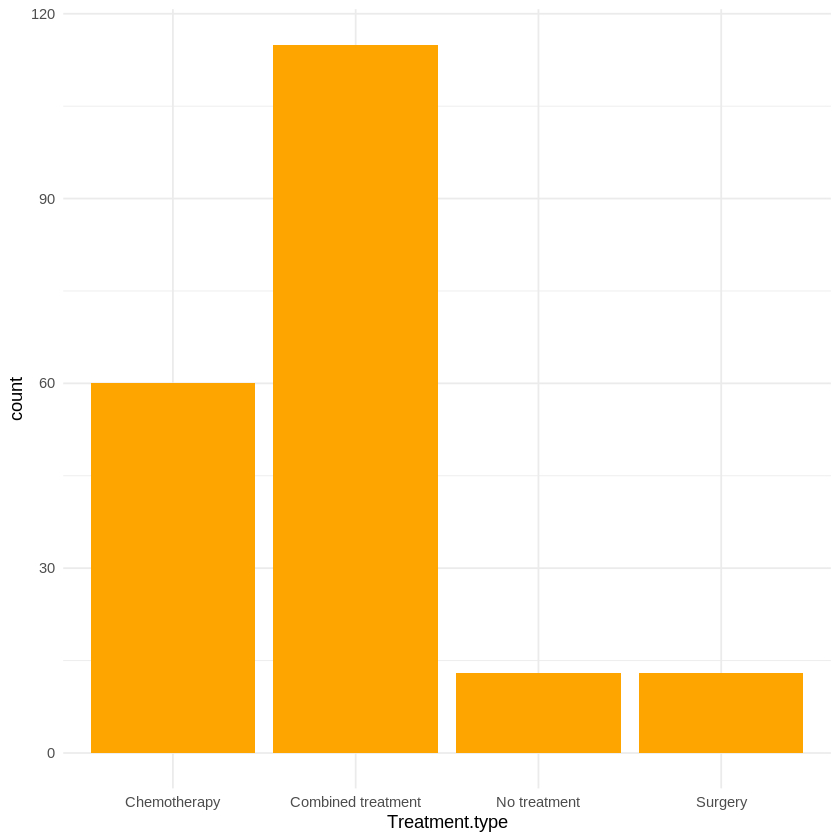

In [40]:
ggplot(data_ptsd, aes(x=Marital.status)) + geom_bar(fill="blue") + theme_minimal()
ggplot(data_ptsd, aes(x=Education)) + geom_bar(fill="green") + theme_minimal()
ggplot(data_ptsd, aes(x=Income)) + geom_bar(fill="red") + theme_minimal()
ggplot(data_ptsd, aes(x=Cancer.stage)) + geom_bar(fill="purple") + theme_minimal()
ggplot(data_ptsd, aes(x=Treatment.type)) + geom_bar(fill="orange") + theme_minimal()

Данные выглядят не слишком сбалансировынными :(

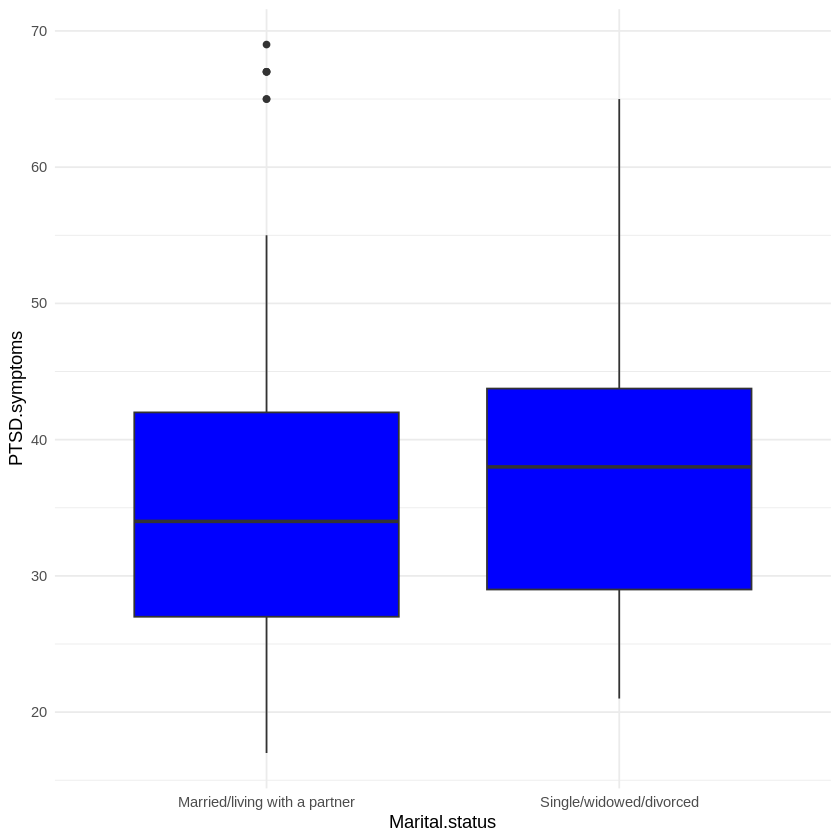

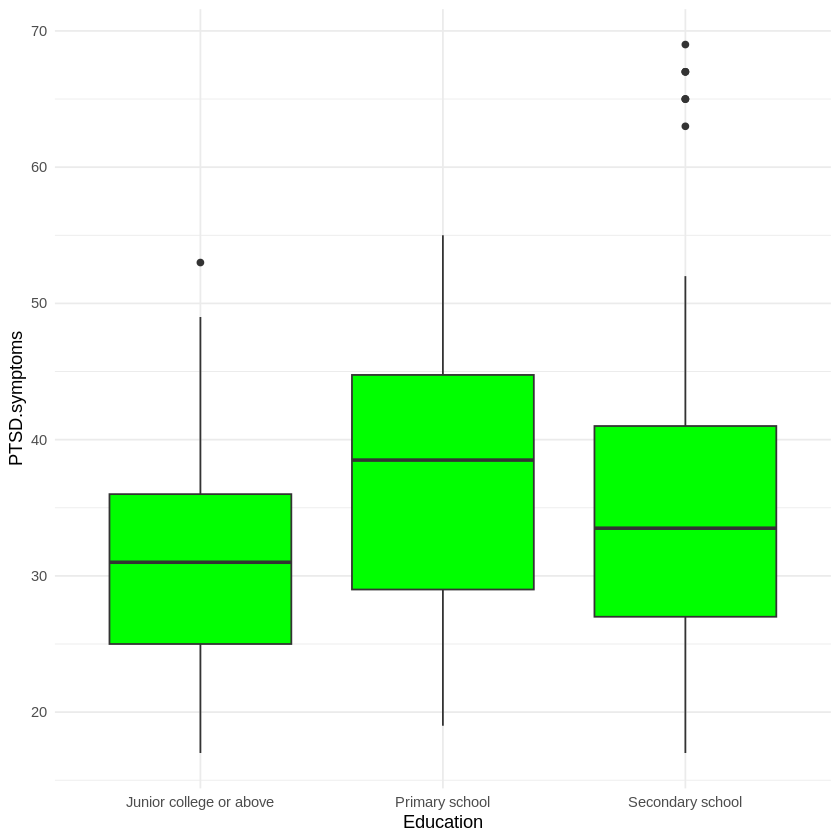

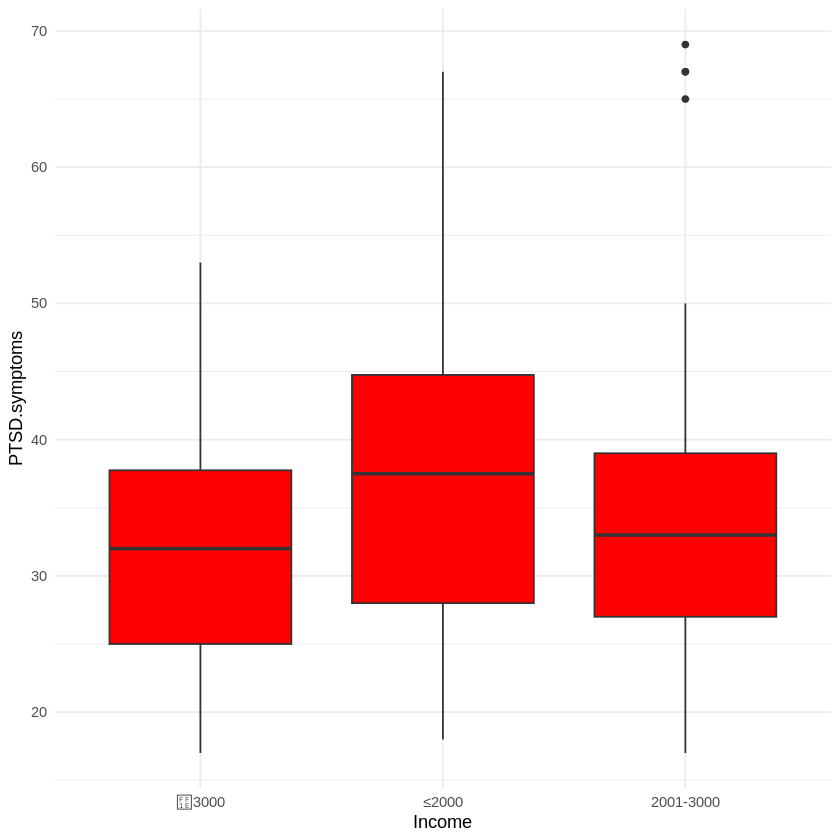

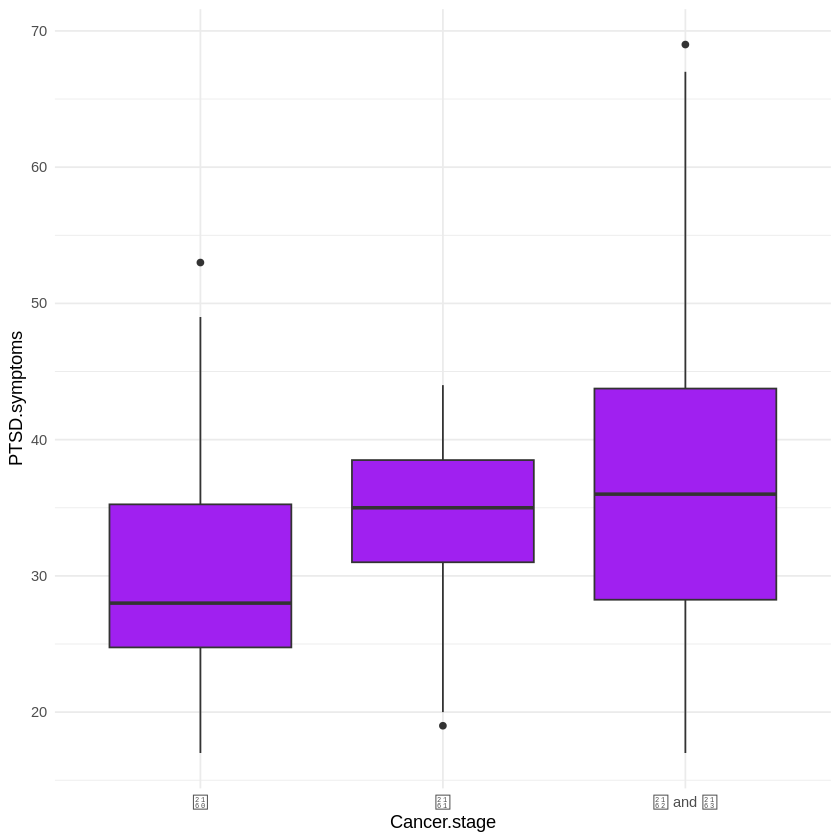

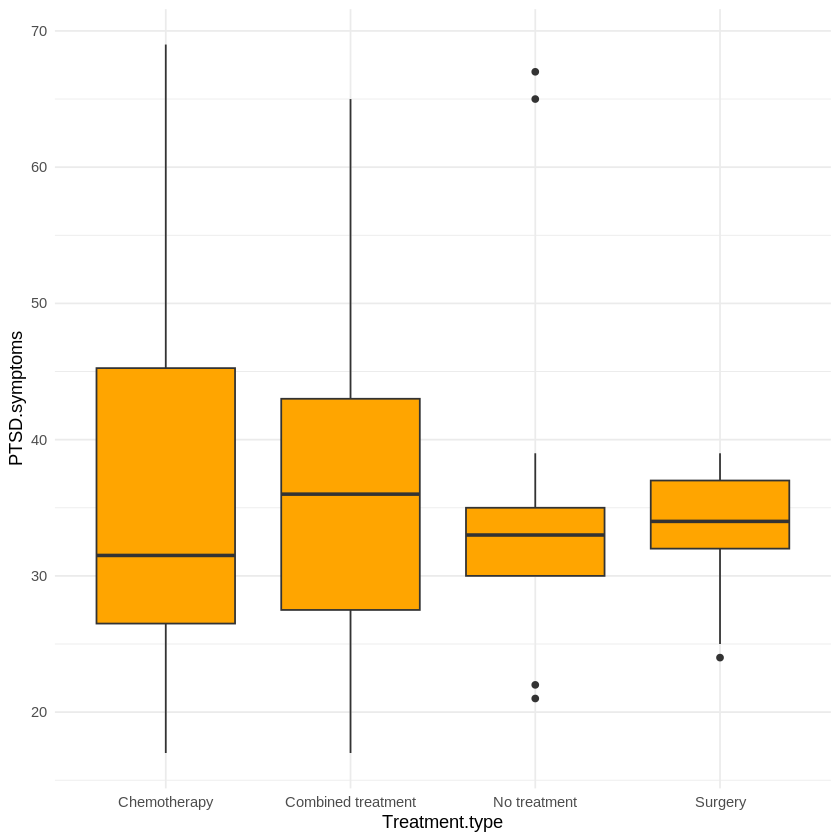

In [46]:
ggplot(data_ptsd, aes(x=Marital.status, y=PTSD.symptoms)) + geom_boxplot(fill="blue") + theme_minimal()
ggplot(data_ptsd, aes(x=Education, y=PTSD.symptoms)) + geom_boxplot(fill="green") + theme_minimal()
ggplot(data_ptsd, aes(x=Income, y=PTSD.symptoms)) + geom_boxplot(fill="red") + theme_minimal()
ggplot(data_ptsd, aes(x=Cancer.stage, y=PTSD.symptoms)) + geom_boxplot(fill="purple") + theme_minimal()
ggplot(data_ptsd, aes(x=Treatment.type, y=PTSD.symptoms)) + geom_boxplot(fill="orange") + theme_minimal()

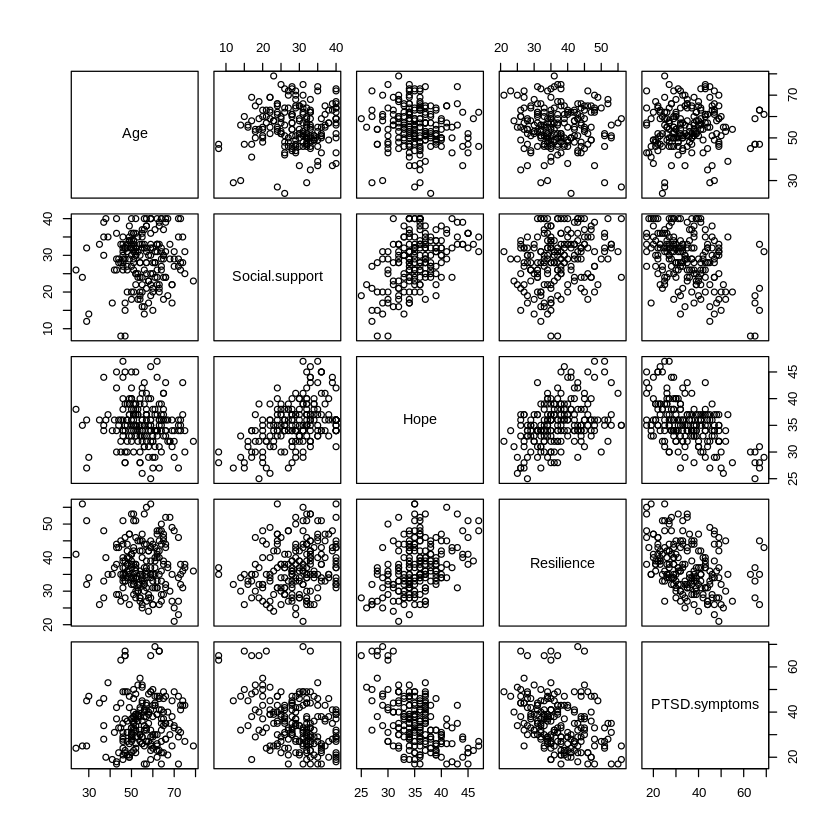

In [47]:
pairs(data_ptsd[, c('Age', 'Social.support', 'Hope', 'Resilience', 'PTSD.symptoms')])

### Дисперсионный анализ

In [121]:
categorical_vars <- c("Marital.status", "Education", "Income", "Cancer.stage", "Treatment.type", "Metastasis")

In [128]:
cat("ANOVA категориальные переменные:\n")
for (var in categorical_vars) {
  cat("ANOVA - ", var, ":\n")
  aov_result <- aov(PTSD.symptoms ~ get(var), data = data_ptsd)
  print(summary(aov_result))
  cat("\n")
  print(TukeyHSD(aov_result))
  cat("\n\n")
}

ANOVA категориальные переменные:
ANOVA -  Marital.status :
             Df Sum Sq Mean Sq F value Pr(>F)
get(var)      1    153   152.6   1.262  0.263
Residuals   199  24046   120.8               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = PTSD.symptoms ~ get(var), data = data_ptsd)

$`get(var)`
                                                          diff       lwr
Single/widowed/divorced-Married/living with a partner 3.051002 -2.303629
                                                           upr     p adj
Single/widowed/divorced-Married/living with a partner 8.405632 0.2625379



ANOVA -  Education :
             Df Sum Sq Mean Sq F value Pr(>F)
get(var)      2    481   240.6   2.008  0.137
Residuals   198  23718   119.8               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = PTSD.symptoms ~ get(var), data = data_ptsd)

$`get(var)`
                                           

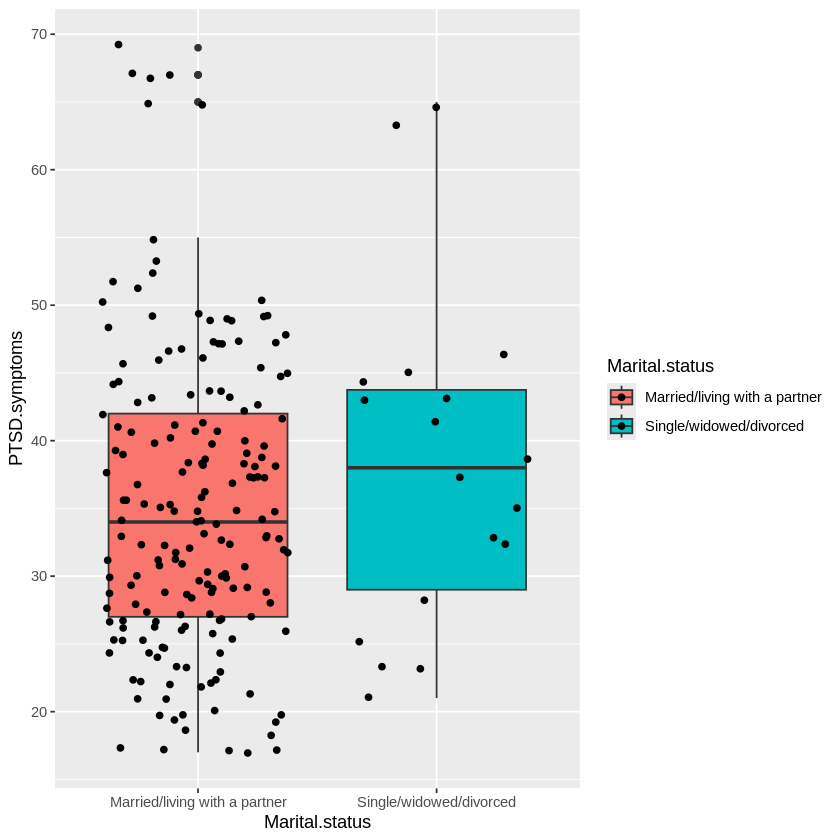

In [129]:
ggplot(data_ptsd, aes(x = Marital.status, y = PTSD.symptoms, fill = Marital.status)) + geom_boxplot() + geom_jitter()

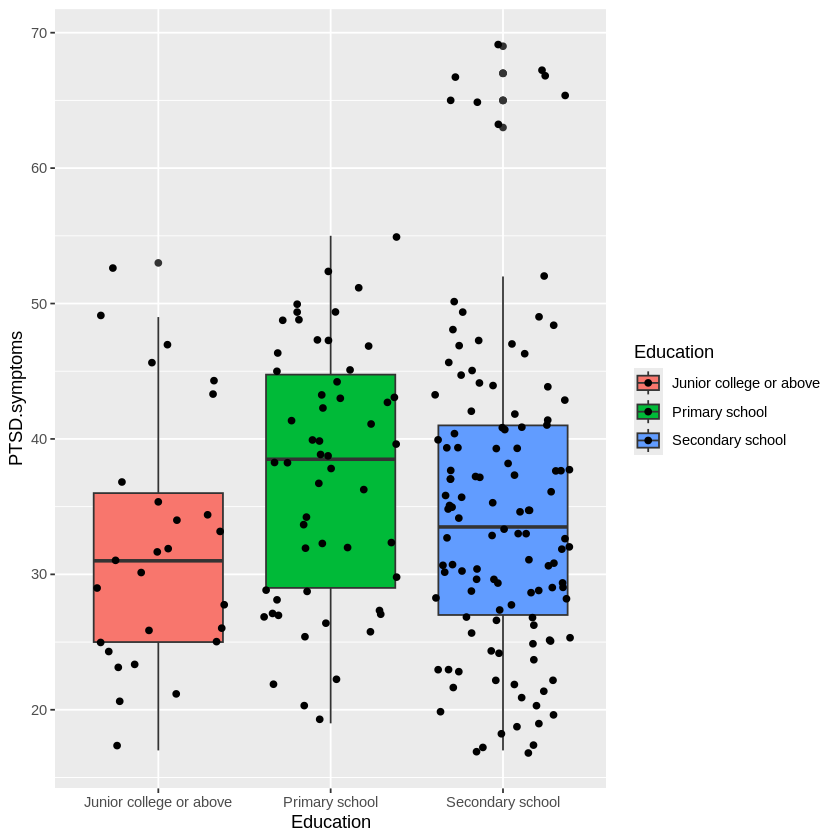

In [130]:
ggplot(data_ptsd, aes(x = Education, y = PTSD.symptoms, fill = Education)) + geom_boxplot() + geom_jitter()

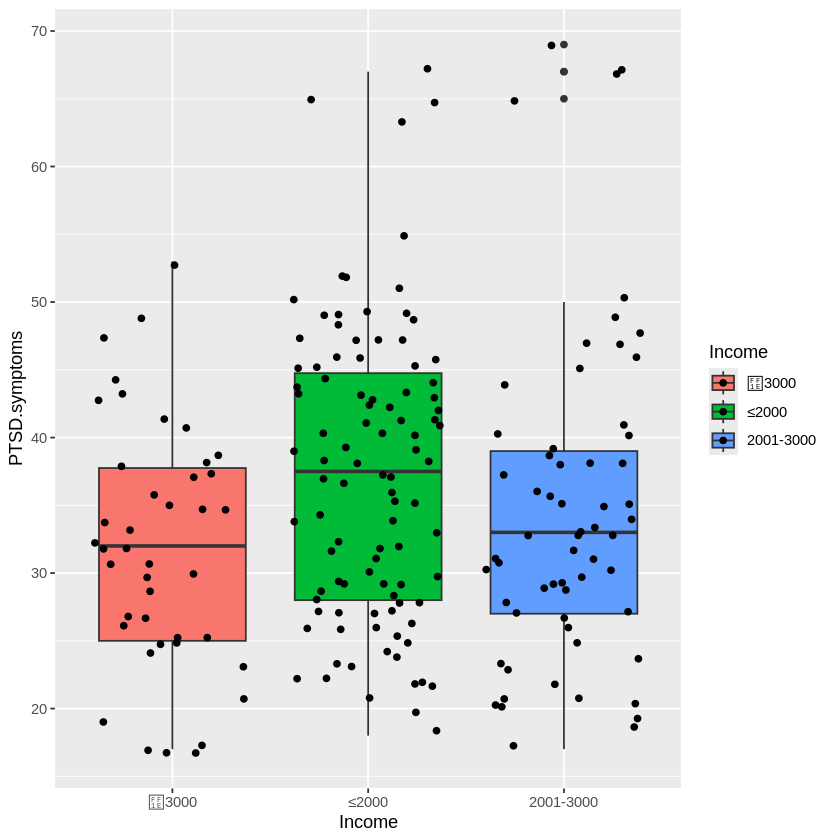

In [134]:
ggplot(data_ptsd, aes(x = Income, y = PTSD.symptoms, fill = Income)) + geom_boxplot() + geom_jitter()

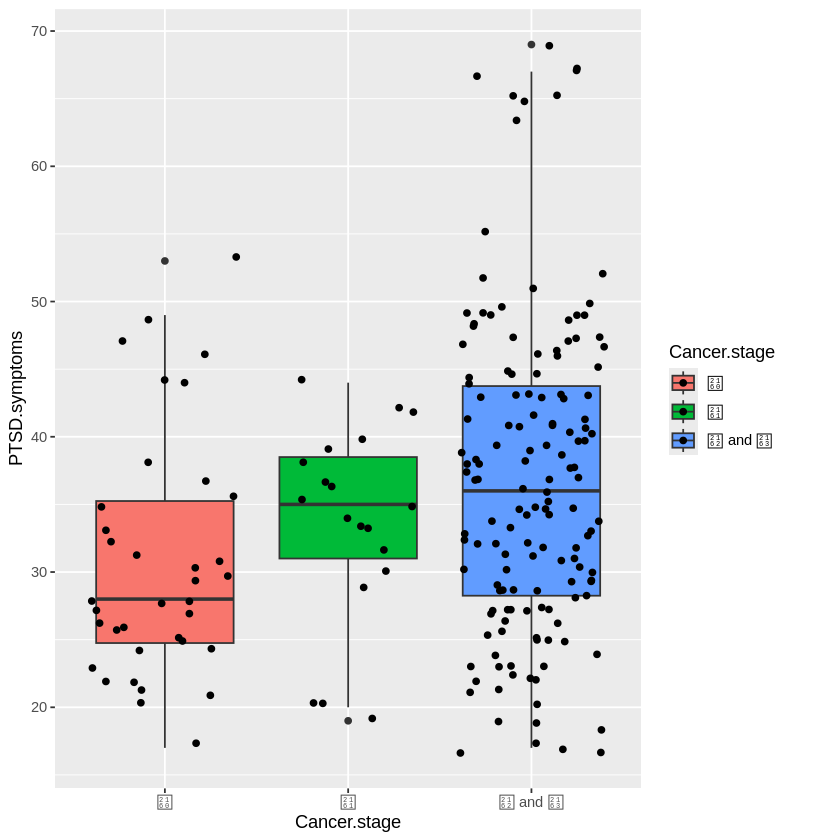

In [131]:
ggplot(data_ptsd, aes(x = Cancer.stage, y = PTSD.symptoms, fill = Cancer.stage)) + geom_boxplot() + geom_jitter()

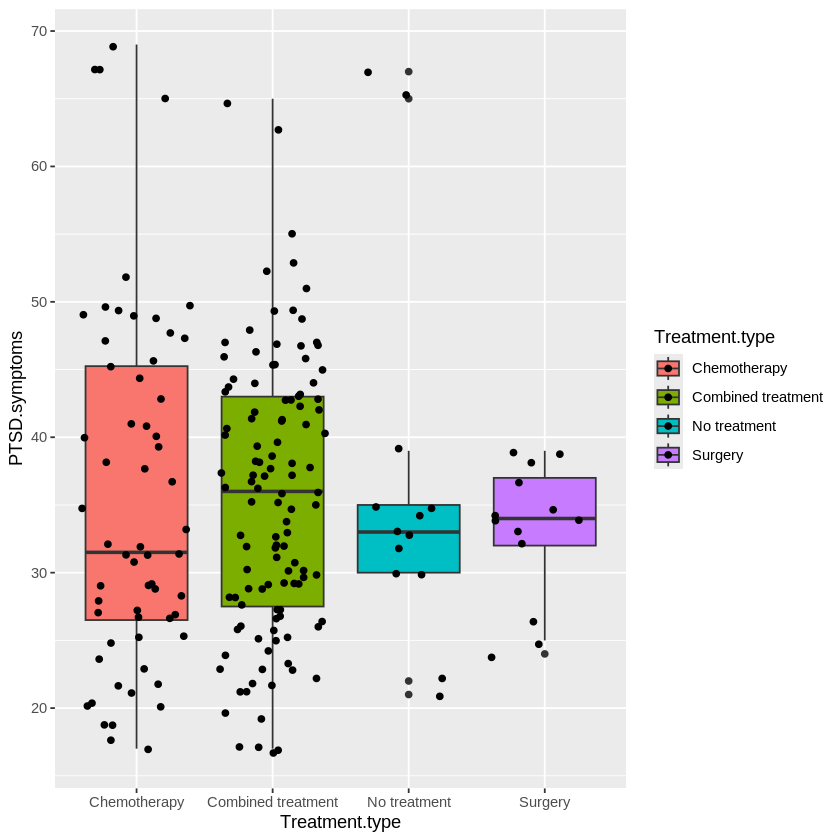

In [132]:
ggplot(data_ptsd, aes(x = Treatment.type, y = PTSD.symptoms, fill = Treatment.type)) + geom_boxplot() + geom_jitter()

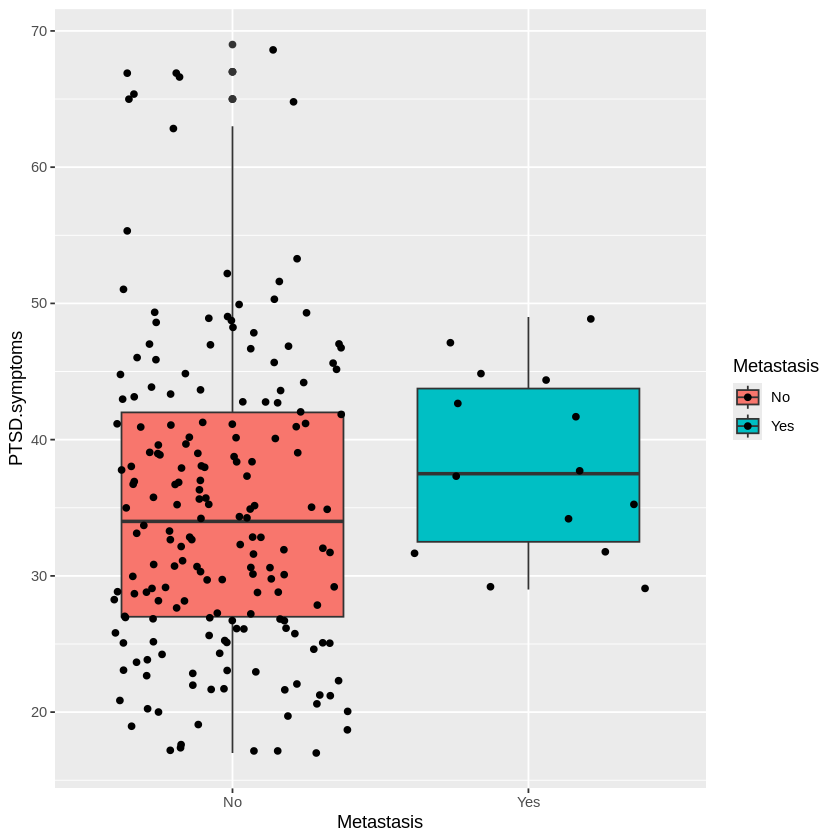

In [133]:
ggplot(data_ptsd, aes(x = Metastasis, y = PTSD.symptoms, fill = Metastasis)) + geom_boxplot() + geom_jitter()

В случае параметров Income и Cancer.stage есть основания отвергнуть нулевую гипотезу - выявлены статистически значимые различия

In [135]:
aov_result <- aov(PTSD.symptoms ~ Income, data = data_ptsd)
summary(aov_result)

             Df Sum Sq Mean Sq F value Pr(>F)  
Income        2    893   446.6   3.794 0.0242 *
Residuals   198  23305   117.7                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pr(>F) < 0.05

In [136]:
aov_result <- aov(PTSD.symptoms ~ Cancer.stage, data = data_ptsd)
summary(aov_result)

              Df Sum Sq Mean Sq F value  Pr(>F)   
Cancer.stage   2   1108   554.0   4.751 0.00965 **
Residuals    198  23091   116.6                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Построение модели регрессии

In [52]:
data_ptsd$Marital.status <- as.numeric(data_ptsd$Marital.status)
data_ptsd$Education <- as.numeric(data_ptsd$Education)
data_ptsd$Income <- as.numeric(data_ptsd$Income)
data_ptsd$Cancer.stage <- as.numeric(data_ptsd$Cancer.stage)
data_ptsd$Treatment.type <- as.numeric(data_ptsd$Treatment.type)
data_ptsd$Metastasis <- as.numeric(data_ptsd$Metastasis)

In [55]:
head(data_ptsd)

,Age,Marital.status,Education,Income,Cancer.stage,Treatment.type,Metastasis,Social.support,Hope,Resilience,PTSD.symptoms
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,46,1,1,3,1,3,1,30,36,39,21
2,53,1,3,2,2,3,1,25,37,30,39
3,58,1,3,3,2,3,1,23,34,42,35
4,57,1,3,3,2,3,1,21,32,44,33
5,56,1,2,2,3,3,1,16,31,32,34
6,56,1,2,2,3,3,1,14,33,30,32


In [56]:
str(data_ptsd)

'data.frame':	201 obs. of  11 variables:
 $ Age           : int  46 53 58 57 56 56 47 47 51 51 ...
 $ Marital.status: num  1 1 1 1 1 1 1 1 2 2 ...
 $ Education     : num  1 3 3 3 2 2 3 3 3 3 ...
 $ Income        : num  3 2 3 3 2 2 2 2 2 2 ...
 $ Cancer.stage  : num  1 2 2 2 3 3 3 3 3 3 ...
 $ Treatment.type: num  3 3 3 3 3 3 3 3 3 3 ...
 $ Metastasis    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Social.support: int  30 25 23 21 16 14 15 17 33 31 ...
 $ Hope          : int  36 37 34 32 31 33 28 30 37 35 ...
 $ Resilience    : int  39 30 42 44 32 30 35 33 53 51 ...
 $ PTSD.symptoms : int  21 39 35 33 34 32 67 65 35 33 ...


In [57]:
summary(data_ptsd)

      Age        Marital.status   Education         Income       Cancer.stage  
 Min.   :24.00   Min.   :1.00   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:50.00   1st Qu.:1.00   1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :55.00   Median :1.00   Median :3.000   Median :2.000   Median :3.000  
 Mean   :55.28   Mean   :1.09   Mean   :2.463   Mean   :2.095   Mean   :2.547  
 3rd Qu.:62.00   3rd Qu.:1.00   3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :79.00   Max.   :2.00   Max.   :3.000   Max.   :3.000   Max.   :3.000  
 Treatment.type    Metastasis   Social.support       Hope        Resilience   
 Min.   :1.000   Min.   :1.00   Min.   : 8.00   Min.   :25.0   Min.   :21.00  
 1st Qu.:1.000   1st Qu.:1.00   1st Qu.:25.00   1st Qu.:33.0   1st Qu.:32.00  
 Median :2.000   Median :1.00   Median :30.00   Median :35.0   Median :36.00  
 Mean   :1.896   Mean   :1.07   Mean   :28.98   Mean   :35.4   Mean   :37.29  
 3rd Qu.:2.000   3rd Qu.:1.00   3rd Qu.:33.00

### Делим на обучающую и валидационную выборки

In [58]:
set.seed(43)

обучающая выборка 80%, валидационная 20%

In [59]:
trainIndex <- createDataPartition(data_ptsd$PTSD.symptoms, p = .8, list = FALSE, times = 1)
dataTrain <- data_ptsd[ trainIndex,]
dataValid <- data_ptsd[-trainIndex,]

### Строим модель

In [61]:
model <- lm(PTSD.symptoms ~ Age + Marital.status + Education + Income + Cancer.stage +
              Treatment.type + Social.support + Hope + Resilience, data = dataTrain)

summary(model)


Call:
lm(formula = PTSD.symptoms ~ Age + Marital.status + Education + 
    Income + Cancer.stage + Treatment.type + Social.support + 
    Hope + Resilience, data = dataTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.897  -5.841  -1.308   5.495  28.510 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    80.713930  10.800305   7.473 5.62e-12 ***
Age            -0.002775   0.077321  -0.036  0.97141    
Marital.status  2.111936   2.541503   0.831  0.40728    
Education       0.696106   1.057152   0.658  0.51122    
Income          0.240363   1.070031   0.225  0.82257    
Cancer.stage    1.562185   0.962689   1.623  0.10671    
Treatment.type -0.830927   0.964848  -0.861  0.39048    
Social.support -0.327093   0.121931  -2.683  0.00811 ** 
Hope           -0.957804   0.218797  -4.378 2.21e-05 ***
Resilience     -0.229786   0.114845  -2.001  0.04718 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard er

### Выполняем оценку

In [81]:
predictions_tr <- predict(model, dataTrain)

In [82]:
mae_t <- mean(abs(predictions_tr - dataTrain$PTSD.symptoms))
mse_t <- mean((predictions_tr - dataTrain$PTSD.symptoms)^2)
r2_t <- cor(predictions_tr, dataTrain$PTSD.symptoms)^2

In [83]:
predictions <- predict(model, dataValid)

In [84]:
mae <- mean(abs(predictions - dataValid$PTSD.symptoms))
mse <- mean((predictions - dataValid$PTSD.symptoms)^2)
r2 <- cor(predictions, dataValid$PTSD.symptoms)^2

In [85]:
evaluation_metrics_t <- data.frame(MAE = mae_t, MSE = mse_t, R2 = r2_t)
evaluation_metrics <- data.frame(MAE = mae, MSE = mse, R2 = r2)

In [86]:
print("train:")
print(evaluation_metrics_t)

[1] "train:"
       MAE      MSE        R2
1 7.158983 80.89393 0.3509934


In [87]:
print("valid:")
print(evaluation_metrics)

[1] "valid:"
       MAE      MSE        R2
1 6.673999 60.41044 0.4195753
